In [2]:
__author__ = 'suvrat'

from csv import DictReader
import pandas as pd

origFile = './air/log_feature.csv'
csvFile = './air/log_feature_filtered.csv'
actionType = []
fieldName = 'log_feature'
idField = 'id'
totalTime = []

def filterCategorical(data, column, value):
    counts = dict(data[column].value_counts())
    for itr in counts:
        if counts[itr] < value:
            counts[itr] = -1
    result = []
    for index, row in data.iterrows():
        if counts[row[column]] == -1:
            result.extend(['log_other'])
        else:
            result.extend([row[column]])
    print len(result), len(data.index)
    data[column] = result
    return data

data = pd.read_csv(origFile,)
data = filterCategorical(data, 'log_feature', 0)
data.to_csv(csvFile, index=False)

for e, row in enumerate( DictReader(open(csvFile)) ):
    if not(row[fieldName] in actionType):
        actionType.append(row[fieldName])
    if (e%100000)==0:
        print e

print actionType

id = '6597'
outFile = './air/logFreq.csv'
freq = [0] * (len(actionType)+1)


with open(outFile,"wb") as outfile:
    outfile.write("%s,%s\n" % (idField,','.join(actionType)))
    for e, row in enumerate( DictReader(open(csvFile)) ):
        if row[idField] == id:
            freq[actionType.index(row[fieldName])] += int(row['volume'])
        else:
            outfile.write("%s,%s\n" % (id,','.join([str(i) for i in freq])))
            freq = [0] * len(actionType)
            id = row[idField]
            freq[actionType.index(row[fieldName])] += int(row['volume'])
    


58671 58671
0
['feature 68', 'feature 172', 'feature 56', 'feature 193', 'feature 71', 'feature 201', 'feature 80', 'feature 203', 'feature 82', 'feature 111', 'feature 219', 'feature 134', 'feature 159', 'feature 198', 'feature 76', 'feature 167', 'feature 51', 'feature 228', 'feature 230', 'feature 308', 'feature 310', 'feature 301', 'feature 221', 'feature 307', 'feature 312', 'feature 232', 'feature 227', 'feature 160', 'feature 309', 'feature 229', 'feature 181', 'feature 314', 'feature 313', 'feature 234', 'feature 233', 'feature 84', 'feature 205', 'feature 54', 'feature 170', 'feature 206', 'feature 15', 'feature 182', 'feature 149', 'feature 62', 'feature 63', 'feature 183', 'feature 2', 'feature 137', 'feature 384', 'feature 299', 'feature 385', 'feature 300', 'feature 386', 'feature 73', 'feature 195', 'feature 133', 'feature 132', 'feature 217', 'feature 218', 'feature 109', 'feature 42', 'feature 157', 'feature 196', 'feature 74', 'feature 178', 'feature 273', 'feature 345

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:7: FutureWarning: sort is deprecated, use sort_values(inplace=True) for for INPLACE sorting


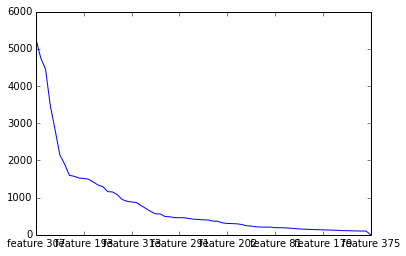

In [2]:
%matplotlib inline
import pandas as pd
data = pd.read_csv(outFile)
data = data.drop('id', axis=1)
data = data.sum()
data.columns = ['log', 'count']
data.sort(['count'], ascending=False, inplace=True)
data.plot()

In [4]:
%matplotlib inline
import pandas as pd
data = pd.read_csv(origFile)
groupData = data.groupby(['id']).count()['volume']
#print groupData
groupData.to_csv('./air/logGroup.csv')